# GROUP 35 - STAT 301 FINAL REPORT

### Group member:
- Doris Che (33996984)
- Eric Kim (87743738)
- Naufal Prasojo (14303440)
- Isaiah Nitin (79496493)


### **2. INTRODUCTION**


We are interested to understand which listing characteristics (e.g `price`, `superhost`, etc) and location-based features (e.g `dist`, `metro_dist`, `attr_index_n`, etc) are most strongly associated with higher or lower Airbnb's `guest_satisfaction` in Athens. Our reponse variable will be `guest_satisfaction`, representing the overall guest satisfaction level of the Airbnb listing in Athens. Our question is focused on inference, as we are investing the association between the response and explanatory variables. We are not using the explanatory variables to predict what the satisfaction rating of an arbitrary listing may be.

### **3. Methods and Results**

> ##### a. Data

**1.1 Data Summary**
- **Dataset Name:** Airbnb Prices in European Cities
- **Source:** Kaggle dataset by The Devastator (2021). Available at
https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities
- **License:** CC BY-NC 4.0 (Attribution-NonCommercial).
- **Data Collection:** Listings were web-scraped from Airbnb for 10 European cities (Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, London, Paris, Rome, Vienna), but for this assignment we only use Athens data.
     - Each city has two files (weekday and weekend) capturing snapshot prices for 2-night stays for two guests.
     - Approx. 2627~2653 observations (rows) and 19 variables (columns).

In [1]:
library(cowplot)
## In R console: install.packages("cowplot")  
## if not already installed 
library(tidyverse)
library(ggplot2)
library(dplyr)
library(broom)

# Read CSV files
athens_weekdays <- read.csv("data/athens_weekdays.csv")
athens_weekends <- read.csv("data/athens_weekends.csv")

# Check for missing values
colSums(is.na(athens_weekdays))
colSums(is.na(athens_weekends))

# Summary statistics
summary(athens_weekdays$realSum)
summary(athens_weekends$realSum)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


X                    realSum 
                         0                          0 
                 room_type                room_shared 
                         0                          0 
              room_private            person_capacity 
                         0                          0 
         host_is_superhost                      multi 
                         0                          0 
                       biz         cleanliness_rating 
                         0                          0 
guest_satisfaction_overall                   bedrooms 
                         0                          0 
                      dist                 metro_dist 
                         0                          0 
                attr_index            attr_index_norm 
                         0                          0 
                rest_index            rest_index_norm 
                         0                          0 
                       lng                        lat 
                         0                          0

X                    realSum 
                         0                          0 
                 room_type                room_shared 
                         0                          0 
              room_private            person_capacity 
                         0                          0 
         host_is_superhost                      multi 
                         0                          0 
                       biz         cleanliness_rating 
                         0                          0 
guest_satisfaction_overall                   bedrooms 
                         0                          0 
                      dist                 metro_dist 
                         0                          0 
                attr_index            attr_index_norm 
                         0                          0 
                rest_index            rest_index_norm 
                         0                          0 
                       lng                        lat 
                         0                          0

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   42.88    99.59   127.72   155.87   171.54 18545.45 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  42.88   98.66  127.72  147.58  171.54 1043.28 


**Variable Description**

| Variable Name                        | Type                | Description                                                         |
| :----------------------------------- | :------------------ | :------------------------------------------------------------------ |
| `realSum`                            | Numeric             | Total price (in euros) for the stay.                                |
| `room_type`                          | Categorical         | Type of accommodation (Entire home/apt, Private room, Shared room). |
| `room_shared`                        | Boolean             | 'True' if room is shared; 'False' otherwise.                        |
| `room_private`                       | Boolean             | 'True' if room is private; 'False' otherwise.                       |
| `person_capacity`                    | Integer             | Maximum number of guests.                                           |
| `superhost`                          | Boolean             | 'True' if host is a Superhost status; 'False' otherwise.            |
| `multi`                              | Boolean             | 'True' if host owns 2–4 listings; 'False' otherwise.                |
| `biz`                                | Boolean             | 'True' if host is a business (>4 listings).                         |
| `cleanliness_rating`                 | Numeric (1–10)      | Guest-reported cleanliness rating.                                  |
| `guest_satisfaction_overall`         | Numeric (1–100)     | Overall guest satisfaction score.                                   |
| `bedrooms`                           | Integer             | Number of bedrooms (0 for studio).                                  |
| `dist`                               | Numeric             | Distance from city centre (km).                                     |
| `metro_dist`                         | Numeric             | Distance from nearest metro station (km).                           |
| `attr_index`                         | Numeric             | Local attraction density index.                                     |
| `rest_index`                         | Numeric             | Local restaurant density index.                                     |
| `attr_index_norm`, `rest_index_norm` | Numeric             | Normalized versions of indices for comparability across cities.     |
| `lng`, `lat`                         | Numeric             | Longitude and latitude coordinates of listing.                      |

**1.2 Source and Information**

The data were collected by web-scraping Airbnb public listings around 2020–2021 by The Devastator. The author compiled cleaned CSV files for each city and time category (weekday vs weekend) and license as CC BY-NC 4.0 (Attribution-NonCommercial).

**1.3 Pre-Selection of Variables**

- Variables to keep: `guest_satisfaction_overall` (as response variable), `realSum`, `superhost`, `cleanliness_rating`, `dist`, `metro_dist`, `attr_index_norm`, `rest_index_norm`.

Reasoning: These variables seem most useful for both understanding factors for Airbnb prices or for building a model that can help estimate fair prices for future listings in Athens.

- Variables to drop (initial cleaning phase):

    - `room_type` - reflects a guest’s functional need rather than overall satisfaction, so it’s not a meaningful explanatory variable for rating differences.
    - `person_capacity` - highly correlated with other size-related features but adds little/none independent information for satisfaction.
    - `weekday/weekend` - categorical timing variable that might not relevant with overall satisfaction.
    - `lng`, `lat` – spatial coordinates does not needed for non-map models (but can be added later for spatial EDA).
    - `attr_index`, `rest_index` – very similar with normalized versions and may introduce redundancy.
    - `multi`, `biz` – may be reintroduced if host type becomes an interest variable, but initial models will focus on inference model for price.
    - `room_shared`, `room_private` – these indicators are redundant with `room_type`, so I will not include.

Reasoning: Variables dropped contain redundant or identifier information not directly useful for predictive or interpretive modelling. All decisions will be re-evaluated after EDA.

----------

> ##### b. Exploratory Data Analysis (EDA)

In [17]:
# Cleaning data: removing nonsense outliers
"number obeservations for realSum >= 10000: "
nrow(athens_weekdays[athens_weekdays$realSum >= 10000, ])

athens_weekdays_clean <- athens_weekdays %>% filter(realSum < 10000)
summary(athens_weekdays_clean$guest_satisfaction_overall)

athens_weekends_clean <- athens_weekends %>% filter(realSum < 10000)
summary(athens_weekends_clean$guest_satisfaction_overall)

# Combine datasets for comparison plots + add binary period column
athens <- bind_rows(
  athens_weekdays_clean %>% mutate(period = "Weekday"),
  athens_weekends_clean %>% mutate(period = "Weekend")
) %>%
  mutate(period = factor(period, levels = c("Weekday","Weekend")))

head(athens)

[1] "number obeservations for realSum >= 10000: "

[1] 1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   20.0    94.0    97.0    95.1   100.0   100.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   93.00   97.00   94.91  100.00  100.00 

,X,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,⋯,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,period
,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0,129.82448,Entire home/apt,False,False,4,False,0,0,10,⋯,2,2.8139635,0.8818900,55.34857,2.086871,78.77838,5.915160,23.76600,37.98300,Weekday
2,1,138.96375,Entire home/apt,False,False,4,True,1,0,10,⋯,1,0.4072929,0.3045679,240.30665,9.060559,407.16770,30.572629,23.73168,37.97776,Weekday
3,2,156.30492,Entire home/apt,False,False,3,True,0,1,10,⋯,1,1.2372111,0.2884881,199.50737,7.522257,395.96740,29.731642,23.72200,37.97900,Weekday
4,3,91.62702,Entire home/apt,False,False,4,True,1,0,10,⋯,1,4.3674572,0.2974673,39.80305,1.500740,58.70658,4.408047,23.72712,38.01435,Weekday
5,4,74.05151,Private room,False,True,2,False,0,0,10,⋯,1,2.1941850,0.3852657,78.73340,2.968577,113.32597,8.509204,23.73391,37.99529,Weekday
6,5,113.88934,Entire home/apt,False,False,6,True,1,0,10,⋯,2,2.0712056,0.4538674,96.58899,3.641806,158.64432,11.911981,23.71584,37.98598,Weekday


In [ ]:
# Visualizing the distribution of guest_satisfaction_overall for weekdays and weekends

distribution_satisfaction_weekends <- ggplot(athens_weekends_clean, aes(x = guest_satisfaction_overall)) +
    geom_histogram(bins = 30, fill = "orange", color = "white") +
    labs(title = "Distribution of Airbnb Guest Satisfaction in Athens on weekends",
        x = "Guest Satisfaction Overall",
        y = "Count") +
    theme_minimal()

distribution_satisfaction_weekdays <- ggplot(athens_weekdays_clean, aes(x = guest_satisfaction_overall)) +
    geom_histogram(bins = 30, fill = "skyblue", color = "white") +
    labs(title = "Distribution of Airbnb Guest Satisfaction in Athens on weekdays",
        x = "Guest Satisfaction Overall",
        y = "Count") +
    theme_minimal()

distribution_satisfaction_combine <- ggplot(athens, aes(x = guest_satisfaction_overall, fill = period, color = period)) +
  geom_histogram(position = "identity", alpha = 0.6) +
  labs(title = "Distribution of Airbnb Guest Satisfaction in Athens",
        x = "Guest Satisfaction Overall",
        y = "Count") +
  scale_fill_brewer(palette = "Set2") +
  scale_color_brewer(palette = "Set2")

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
`geom_smooth()` using formula = 'y ~ x'


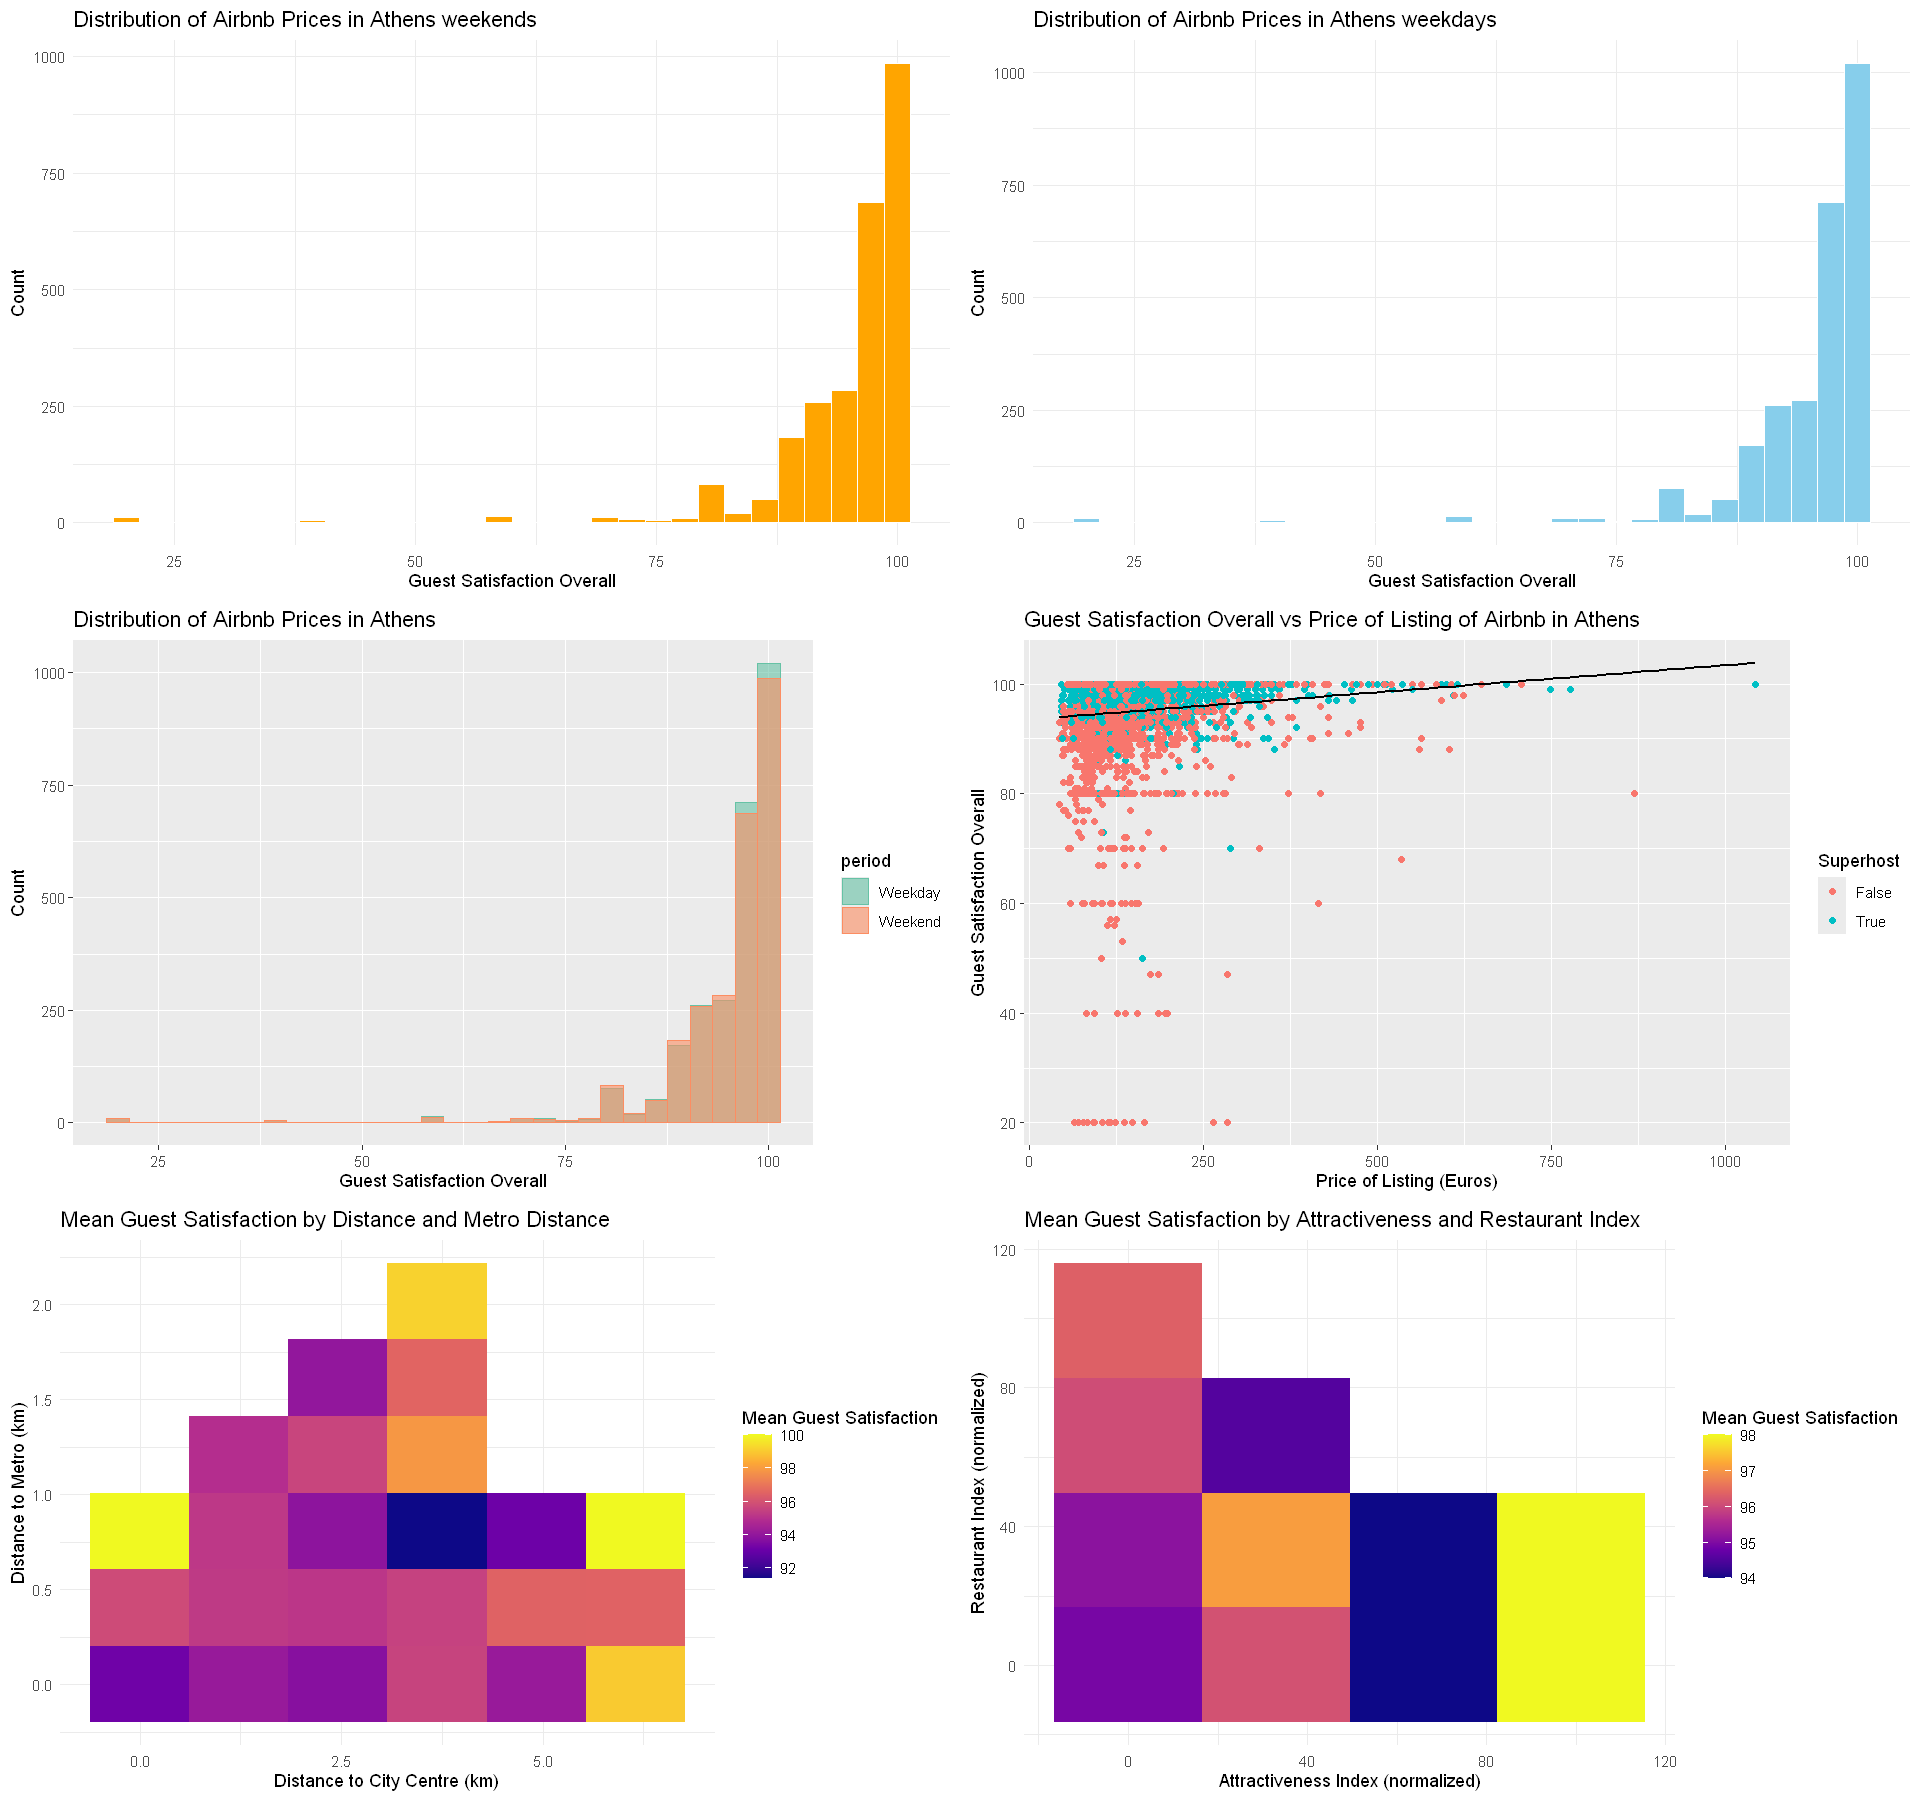

In [23]:
satis_double_dist_plot <- ggplot(athens, aes(x = dist, y = metro_dist, z = guest_satisfaction_overall)) +
  stat_summary_2d(fun = mean, bins = 6) +
  scale_fill_viridis_c(option = "C") +
  labs(title = "Mean Guest Satisfaction by Distance and Metro Distance",
       x = "Distance to City Centre (km)", y = "Distance to Metro (km)",
       fill = "Mean Guest Satisfaction") +
  theme_minimal()

satis_double_index_plot <- ggplot(athens, aes(x = attr_index_norm, y = rest_index_norm, z = guest_satisfaction_overall)) +
  stat_summary_2d(fun = mean, bins = 4) +
  scale_fill_viridis_c(option = "C") +
  labs(title = "Mean Guest Satisfaction by Attractiveness and Restaurant Index",
       x = "Attractiveness Index (normalized)", y = "Restaurant Index (normalized)",
       fill = "Mean Guest Satisfaction") +
  theme_minimal()

athens_combined_plot <- athens |>
    ggplot(aes(x = realSum, y = guest_satisfaction_overall, color = host_is_superhost)) +
           geom_point() +
           geom_smooth(method = "lm", se = FALSE, color = "black", linewidth = 0.7) +
           ggtitle("Guest Satisfaction Overall vs Price of Listing of Airbnb in Athens") +
           xlab("Price of Listing (Euros)") +
           ylab("Guest Satisfaction Overall") +
           labs(color = "Superhost")

options(repr.plot.width = 16, repr.plot.height = 15)
plot_grid(distribution_satisfaction_weekends, distribution_satisfaction_weekdays,
          distribution_satisfaction_combine, athens_combined_plot,
          satis_double_dist_plot, satis_double_index_plot,
          ncol = 2)